
LLM Data counts for Is your family overweight or obese?:
No     53
Yes    47
Name: Is your family overweight or obese?, dtype: int64

LLM Data counts for Do you frequently consume fast food?:
No     68
Yes    32
Name: Do you frequently consume fast food?, dtype: int64

LLM Data counts for How often do you consume vegetables?:
Sometimes    63
Rarely       36
Always        1
Name: How often do you consume vegetables?, dtype: int64

LLM Data counts for How many meals do you have in a day?:
3      76
1-2    24
Name: How many meals do you have in a day?, dtype: int64

LLM Data counts for How often do you eat between meals?:
Rarely       96
Sometimes     4
Name: How often do you eat between meals?, dtype: int64

LLM Data counts for Do you smoke?:
No     99
Yes     1
Name: Do you smoke?, dtype: int64

LLM Data counts for How much liquid do you drink per day?:
1-2L    92
<1L      8
Name: How much liquid do you drink per day?, dtype: int64

LLM Data counts for Do you calculate your calorie int

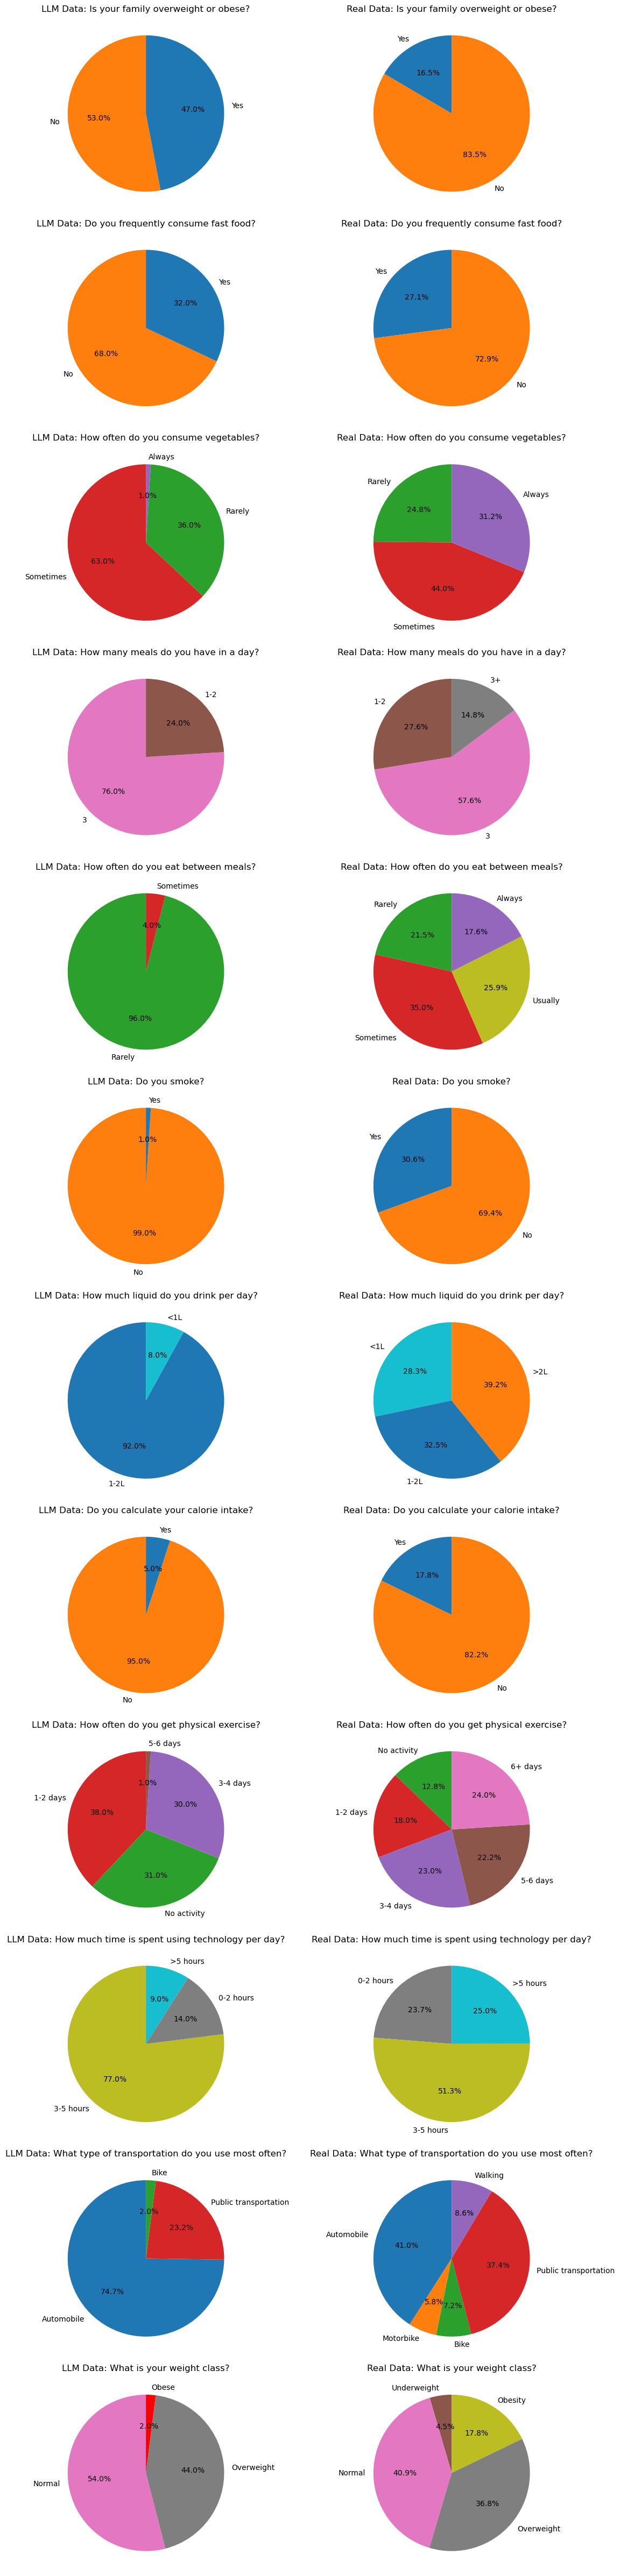

In [107]:
# Define the mapping and real survey responses
question_mapping = {
    "Q2": "Is your family overweight or obese?",
    "Q3": "Do you frequently consume fast food?",
    "Q4": "How often do you consume vegetables?",
    "Q5": "How many meals do you have in a day?",
    "Q6": "How often do you eat between meals?",
    "Q7": "Do you smoke?",
    "Q8": "How much liquid do you drink per day?",
    "Q9": "Do you calculate your calorie intake?",
    "Q10": "How often do you get physical exercise?",
    "Q11": "How much time is spent using technology per day?",
    "Q12": "What type of transportation do you use most often?",
    "Q13": "What is your weight class?"
}

answer_choices = {
    "Q2": {1: "Yes", 2: "No"},
    "Q3": {1: "Yes", 2: "No"},
    "Q4": {1: "Rarely", 2: "Sometimes", 3: "Always"},
    "Q5": {1: "1-2", 2: "3", 3: "3+"},
    "Q6": {1: "Rarely", 2: "Sometimes", 3: "Usually", 4: "Always"},
    "Q7": {1: "Yes", 2: "No"},
    "Q8": {1: "<1L", 2: "1-2L", 3: ">2L"},
    "Q9": {1: "Yes", 2: "No"},
    "Q10": {1: "No activity", 2: "1-2 days", 3: "3-4 days", 4: "5-6 days", 5: "6+ days"},
    "Q11": {1: "0-2 hours", 2: "3-5 hours", 3: ">5 hours"},
    "Q12": {1: "Automobile", 2: "Motorbike", 3: "Bike", 4: "Public transportation", 5: "Walking"},
    "Q13": {1: "Underweight", 2: "Normal", 3: "Overweight", 4: "Obese"}
}

obesity_data = {
    "Is your family overweight or obese?": {"Yes": 266, "No": 1344},
    "Do you frequently consume fast food?": {"Yes": 436, "No": 1174},
    "How often do you consume vegetables?": {"Rarely": 400, "Sometimes": 708, "Always": 502},
    "How many meals do you have in a day?": {"1-2": 444, "3": 928, "3+": 238},
    "How often do you eat between meals?": {"Rarely": 346, "Sometimes": 564, "Usually": 417, "Always": 283},
    "Do you smoke?": {"Yes": 492, "No": 1118},
    "How much liquid do you drink per day?": {"<1L": 456, "1-2L": 523, ">2L": 631},
    "Do you calculate your calorie intake?": {"Yes": 286, "No": 1324},
    "How often do you get physical exercise?": {
        "No activity": 206, "1-2 days": 290, "3-4 days": 370, "5-6 days": 358, "6+ days": 386
    },
    "How much time is spent using technology per day?": {
        "0-2 hours": 382, "3-5 hours": 826, ">5 hours": 402
    },
    "What type of transportation do you use most often?": {
        "Automobile": 660, "Motorbike": 94, "Bike": 116, "Public transportation": 602, "Walking": 138
    },
    "What is your weight class?": {"Underweight": 73, "Normal": 658, "Overweight": 592, "Obesity": 287}
}

color_map = {
    "Yes": "#1f77b4", "No": "#ff7f0e",
    "Rarely": "#2ca02c", "Sometimes": "#d62728", "Always": "#9467bd",
    "1-2": "#8c564b", "3": "#e377c2", "3+": "#7f7f7f",
    "Usually": "#bcbd22",
    "<1L": "#17becf", "1-2L": "#1f77b4", ">2L": "#ff7f0e",
    "No activity": "#2ca02c", "1-2 days": "#d62728", "3-4 days": "#9467bd",
    "5-6 days": "#8c564b", "6+ days": "#e377c2",
    "0-2 hours": "#7f7f7f", "3-5 hours": "#bcbd22", ">5 hours": "#17becf",
    "Automobile": "#1f77b4", "Motorbike": "#ff7f0e", "Bike": "#2ca02c",
    "Public transportation": "#d62728", "Walking": "#9467bd",
    "Underweight": "#8c564b", "Normal": "#e377c2", "Overweight": "#7f7f7f",
    "Obesity": "#bcbd22",
    "BS": "#ff0000"  # Bright red for invalid values
}

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../llm/4ov4.xlsx", sheet_name="Survey Responses")
# Convert dataset to numeric values using the string keys of the questions
df_numeric = df.iloc[:, 9:22].applymap(lambda x: {"A": 1, "B": 2, "C": 3, "D": 4}.get(x, x))

# Create plots using the string keys to align data properly
fig, axes = plt.subplots(len(question_mapping), 2, figsize=(12, len(question_mapping) * 4))

for idx, (q_code, q_text) in enumerate(question_mapping.items()):
    if q_text in obesity_data:
        # Find the column corresponding to the question text
        col_idx = df.columns.get_loc(q_text) if q_text in df.columns else None
        
        if col_idx is not None:
            # Convert LLM data responses to readable text values
            df_counts = df_numeric.iloc[:, col_idx - 9].map(answer_choices[q_code]).value_counts()

            # Debug: Check if LLM data is returning values
            print(f"\nLLM Data counts for {q_text}:")
            print(df_counts)

            real_counts = obesity_data[q_text]

            # Ensure we have data to plot for LLM
            if not df_counts.empty:
                colors_df = [color_map.get(key, "#ff0000") for key in df_counts.index]
                axes[idx, 0].pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', colors=colors_df, startangle=90)
            else:
                axes[idx, 0].text(0.5, 0.5, "No data", ha='center', va='center')

            axes[idx, 0].set_title(f"LLM Data: {q_text}")

            # Plot real data
            colors_real = [color_map.get(key, "#ff0000") for key in real_counts.keys()]
            axes[idx, 1].pie(real_counts.values(), labels=real_counts.keys(), autopct='%1.1f%%', colors=colors_real, startangle=90)
            axes[idx, 1].set_title(f"Real Data: {q_text}")

plt.tight_layout()
plt.show()

In [106]:
print(df_numeric.iloc[:, 4].map(answer_choices["Q5"]).value_counts())

3      76
1-2    24
Name: How many meals do you have in a day?, dtype: int64
